# Predicting Real-Time Cricket Match Insights Using Machine Learning

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [39]:
df=pd.read_csv('t20_bbb.csv')

In [40]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [41]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground


In [42]:
# Rename unnamed to ID column
df = df.rename(columns={'Unnamed: 0': 'ID'})

In [43]:
df

,ID,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [44]:
# Exploratory data analysis
#To check the total number of rows
row_count = df.shape[0] 

#To check the total number of columns
column_count = df.shape[1]  

# To find the number of columns having non-numeric values (c)
non_numeric_columns = df.columns[df.dtypes == 'object']
len_non_numeric = len(non_numeric_columns)

# Columns with missing values
missing_columns = df.columns[df.isna().any()].tolist()
missing_columns_info = [(col, df[col].isna().sum()) for col in missing_columns]
missing_columns_info.sort(key=lambda x: x[1], reverse=True)

# Print the summary of the outputs
print("total number of rows =", row_count)
print("total number of columns =", column_count)
print("number of columns having non-numeric values =", len_non_numeric)
print("columns with missing values =", missing_columns_info)

total number of rows = 63888
total number of columns = 9
number of columns having non-numeric values = 5
columns with missing values = [('city', 8548)]


In [45]:
# Data cleaning
df = df.dropna() # Remove rows with missing values

In [46]:
df.shape

(55340, 9)

In [47]:
# Check for duplicates in the entire DataFrame
duplicates_in_df = df.duplicated().any()
print(f"Any duplicates in the entire DataFrame: {duplicates_in_df}")

Any duplicates in the entire DataFrame: False


In [48]:
print(df.describe())

                 ID      match_id          ball          runs
count  55340.000000  55340.000000  55340.000000  55340.000000
mean      60.832761    494.427720      9.733878      1.313589
std       35.755997    279.869921      5.762384      1.594038
min        0.000000      3.000000      0.100000      0.000000
25%       30.000000    234.000000      4.600000      0.000000
50%       60.000000    530.000000      9.600000      1.000000
75%       92.000000    715.000000     14.600000      1.000000
max      133.000000    964.000000     19.900000      7.000000


In [49]:
print(df['batting_team'].value_counts())

South Africa    7755
India           7266
New Zealand     6915
Pakistan        6626
Sri Lanka       6172
West Indies     6005
England         5600
Australia       4405
Bangladesh      3243
Afghanistan     1353
Name: batting_team, dtype: int64


In [50]:
print(df['bowling_team'].value_counts())

England         7059
West Indies     6831
India           6737
Australia       6319
New Zealand     6066
Sri Lanka       5783
Pakistan        5654
South Africa    5419
Bangladesh      4515
Afghanistan      957
Name: bowling_team, dtype: int64


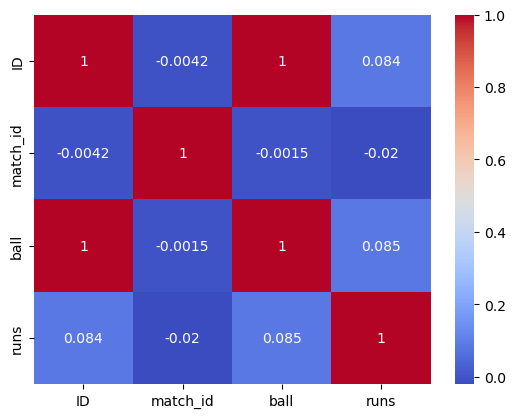

In [51]:
#Calculate the correlation matrix for the dataframe 'df'
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Feature Engineering  

In [52]:
# Add total runs column 
df['total_runs'] = df.groupby(['batting_team'])['runs'].transform('sum')

# Feature Selection
X = df[['total_runs']] 
y = df['batting_team']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44272, 1)
(11068, 1)
(44272,)
(11068,)


In [53]:
# Compare models 
svm = SVC()
rf = RandomForestClassifier(n_estimators=100)

svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))

print('SVM Accuracy:', svm_accuracy)
print('RF Accuracy:', rf_accuracy)


SVM Accuracy: 0.8965486086013733
RF Accuracy: 1.0


In [54]:
# Predictions
svm_predictions = svm.predict(X_test)
rf_predictions = rf.predict(X_test)

# Display actual and predicted values for Team1 and Team2
results_df = pd.DataFrame({'Actual': y_test, 'SVM Predicted': svm_predictions, 'RF Predicted': rf_predictions})

# Column for model comparison
results_df['Model Comparison'] = np.where((results_df['SVM Predicted'] == results_df['Actual']) & (results_df['RF Predicted'] == results_df['Actual']), 'Match', 'Mismatch')


In [55]:
print("--------MATCH OUTCOME----------")
results_df

--------MATCH OUTCOME----------


,Actual,SVM Predicted,RF Predicted,Model Comparison
51399,Sri Lanka,Sri Lanka,Sri Lanka,Match
48925,Australia,Australia,Australia,Match
26528,West Indies,West Indies,West Indies,Match
7836,India,India,India,Match
57203,South Africa,South Africa,South Africa,Match
...,...,...,...,...
6893,India,India,India,Match
39966,New Zealand,New Zealand,New Zealand,Match
35455,Bangladesh,Bangladesh,Bangladesh,Match
15170,South Africa,South Africa,South Africa,Match


# Tuning and Evaluation

Without using an automated hyperparameter tuning technique like Grid Search

In [56]:
# Tune RF hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(X_train, y_train)
rf_predictions_tuned = rf.predict(X_test)
rf_accuracy_tuned = accuracy_score(y_test, rf_predictions_tuned)
print('Tuned RF Accuracy:', rf_accuracy_tuned)

# Interpretation
print('Feature Importances:\n', rf.feature_importances_)

# Conclusion
print('The tuned RF model obtained an accuracy of {} on the test set'.format(rf_accuracy_tuned))

Tuned RF Accuracy: 1.0
Feature Importances:
 [1.]
The tuned RF model obtained an accuracy of 1.0 on the test set


To find accuracy based on GridSearchCV

In [57]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# First Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# To find the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions_tuned = best_rf.predict(X_test)

# To evaluate the tuned model
rf_accuracy_tuned = accuracy_score(y_test, rf_predictions_tuned)
print('Tuned RF Accuracy:', rf_accuracy_tuned)


Tuned RF Accuracy: 1.0


# Data Visualization

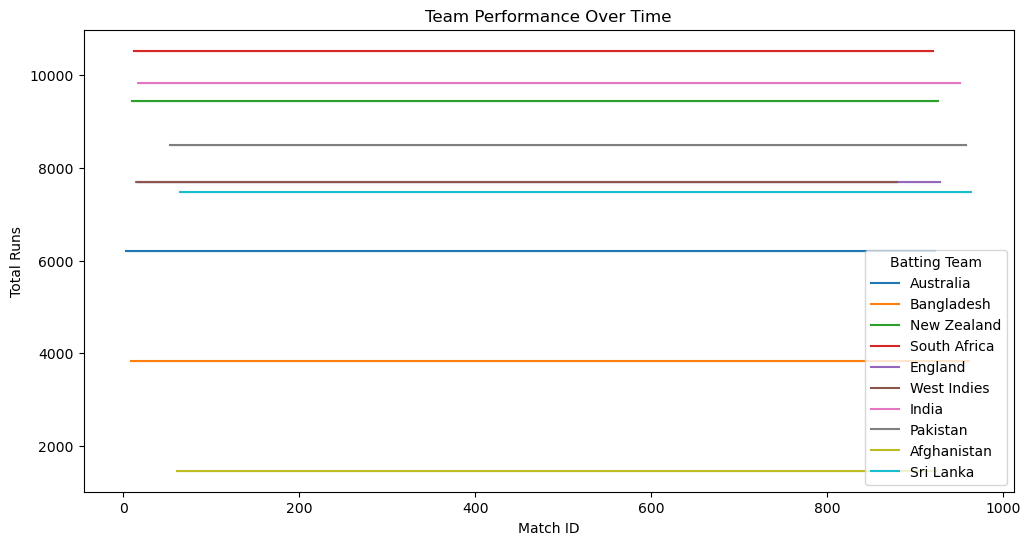

In [58]:
# Team Performance Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='match_id', y='total_runs', hue='batting_team', data=df)
plt.title('Team Performance Over Time')
plt.xlabel('Match ID')
plt.ylabel('Total Runs')
plt.legend(title='Batting Team')
plt.show()

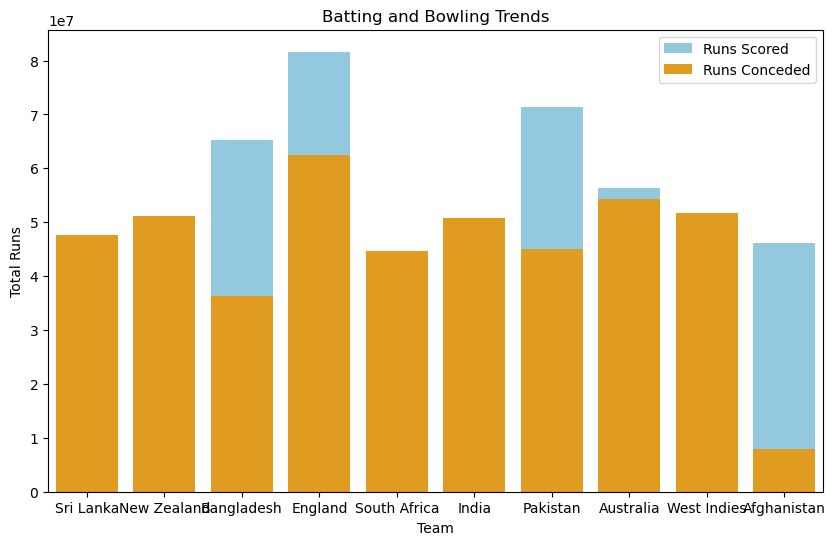

In [59]:
# Batting and Bowling Trends
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_team', y='total_runs', data=df, ci=None, estimator=sum, color='skyblue', label='Runs Scored')
sns.barplot(x='bowling_team', y='total_runs', data=df, ci=None, estimator=sum, color='orange', label='Runs Conceded')
plt.title('Batting and Bowling Trends')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.legend()
plt.show()

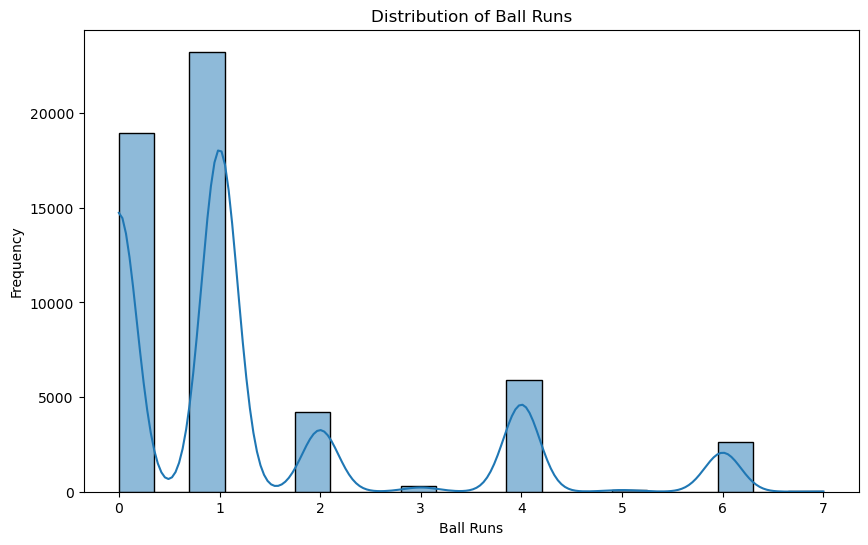

In [60]:
# Ball Runs Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['runs'], bins=20, kde=True)
plt.title('Distribution of Ball Runs')
plt.xlabel('Ball Runs')
plt.ylabel('Frequency')
plt.show()

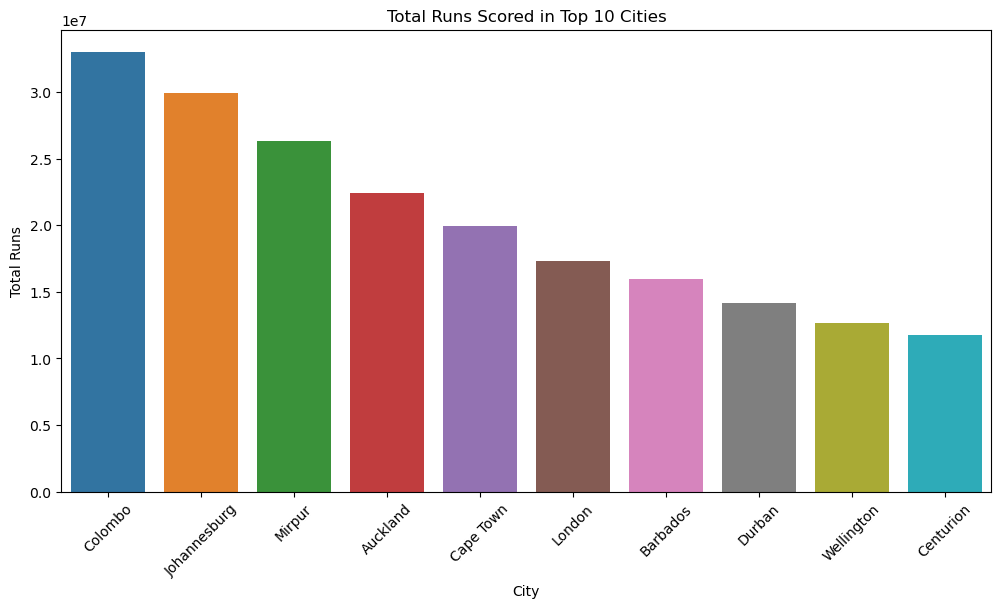

In [61]:
# Calculate total runs for each city
total_runs_by_city = df.groupby('city')['total_runs'].sum().reset_index()

# Sort by total runs in descending order
sorted_total_runs = total_runs_by_city.sort_values(by='total_runs', ascending=False)

# Select the top 10 cities
top_10_cities_total_runs = sorted_total_runs.head(10)

# Plot only for the top 10 cities
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='total_runs', data=df[df['city'].isin(top_10_cities_total_runs['city'])], ci=None, estimator=sum, order=top_10_cities_total_runs['city'])
plt.title('Total Runs Scored in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()


# Score Prediction

In [62]:
import numpy as np

def rule_based_prediction(current_score, overs_done, wickets_fallen):
    # Constants
    overs = 20
    average_score = 160

    # To calculate balls remaining 
    total_balls = overs * 6
    balls_remaining = total_balls - (overs_done * 6)

    # Estimate the additional runs
    runs_per_over = average_score / overs
    additional_runs = round(runs_per_over * (overs - overs_done))

    # Adjust for wickets fallen
    wickets_in_hand = 10 - wickets_fallen
    wickets_factor = (10 + wickets_fallen) / 10
    additional_runs *= wickets_factor  

    # Predict final score
    if wickets_fallen == 10 and overs_done == 20:
        return current_score
    else:
        predicted_score = current_score + additional_runs
        return predicted_score

# User input for rule-based prediction
current_score = int(input("Enter current score: "))
overs_done = float(input("Enter overs done: "))
wickets_fallen = int(input("Enter wickets fallen: "))

# Get the rule-based prediction
rule_based_result = rule_based_prediction(current_score, overs_done, wickets_fallen)

# Print the result
print('Rule-based Prediction:', int(rule_based_result))


Enter current score: 146
Enter overs done: 17
Enter wickets fallen: 7
Rule-based Prediction: 186


In [63]:
# Calculate the final score for each match
final_scores = df.groupby(['match_id', 'batting_team'])['runs'].sum().reset_index()
final_scores.rename(columns={'runs': 'final_score'}, inplace=True)

# Merge this back into the original dataframe
df = df.merge(final_scores, on=['match_id', 'batting_team'])

In [64]:
# Extracting over and ball_no from 'ball' column
df['over'], df['ball_no'] = df['ball'].astype(str).str.split('.').apply(lambda x: (int(x[0]), int(x[1]))).str

# Calculating overs_bowled
df['overs_bowled'] = df['over'] * 6 

# Converting 'player_dismissed' to binary wicket column
df['wicket'] = df['player_dismissed'].apply(lambda x: 0 if x in [None, 0] else 1)

# Calculating cumulative sum of wickets for each match
df['wickets_fallen'] = df.groupby('match_id')['wicket'].cumsum()


In [65]:
# Extracting 'over' and 'ball_no' from 'ball' column
df['over'], df['ball_no'] = df['ball'].astype(str).str.split('.').str

# Calculating cumulative sum of runs for each match as current_score
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

# Calculating the total balls bowled
df['balls_bowled'] = (df['over'].astype(int) * 6) + df['ball_no'].astype(int)

# Calculating the current run rate
df['current_runrate'] = (df['current_score'] * 6) / df['balls_bowled']


In [66]:
# Convert non-dismissals to 0 and dismissals to 1
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == '0' else 1).astype(int)

# Calculate cumulative sum of player dismissals for each match
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()

# Calculate wickets left
df['wickets_left'] = 10 - df['player_dismissed']


In [67]:
df.head()

,ID,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,total_runs,final_score,over,ball_no,overs_bowled,wicket,wickets_fallen,current_score,balls_bowled,current_runrate,wickets_left
0,0,3,Australia,Sri Lanka,0.1,0,0,Victoria,"Simonds Stadium, South Geelong",6212,173,0,1,0,1,1,0,1,0.0,10
1,1,3,Australia,Sri Lanka,0.2,1,0,Victoria,"Simonds Stadium, South Geelong",6212,173,0,2,0,1,2,1,2,3.0,10
2,2,3,Australia,Sri Lanka,0.3,0,0,Victoria,"Simonds Stadium, South Geelong",6212,173,0,3,0,1,3,1,3,2.0,10
3,3,3,Australia,Sri Lanka,0.4,4,0,Victoria,"Simonds Stadium, South Geelong",6212,173,0,4,0,1,4,5,4,7.5,10
4,4,3,Australia,Sri Lanka,0.5,1,0,Victoria,"Simonds Stadium, South Geelong",6212,173,0,5,0,1,5,6,5,7.2,10


# Visualizing the variance explained by each principal component

In [71]:
from sklearn.decomposition import PCA
# To select the features
features = ['total_runs', 'wickets_fallen', 'overs_bowled', 
            'current_score', 'current_runrate'] 

# Create PCA model
pca = PCA()
pca.fit(df[features])

# Plot scree plot  
var_exp = pca.explained_variance_ratio_

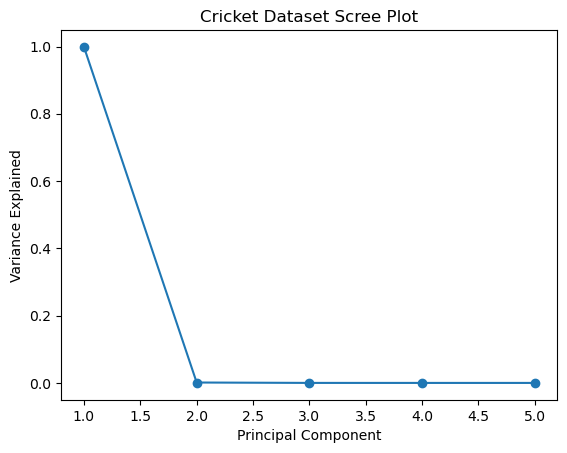

In [72]:
plt.plot(range(1, len(var_exp)+1), var_exp, 'o-') 
plt.title('Cricket Dataset Scree Plot')
plt.xlabel('Principal Component') 
plt.ylabel('Variance Explained')
plt.show()

In [70]:
# Select features and target variable
X = df[['current_score', 'overs_bowled', 'wicket']]
y = df['final_score']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict using user input
current_score = int(input("Enter current score: "))
overs = int(input("Enter total number of overs for the match: "))
print("Total number of balls: ",overs* 6)
overs_done = int(input("Enter overs done: ")) * 6  # Convert overs to balls
print("Numer of balls done:",overs_done)
if overs_done <= (overs * 6):
    wicket = int(input("Enter wickets fallen: "))
    if (overs * 6) == overs_done:
        print("Test")
        predicted_score = current_score 
    elif wicket ==10:
        predicted_score = current_score
    else:
        user_input = pd.DataFrame([[current_score, overs_done, wicket]],
                              columns=['current_score', 'overs_bowled', 'wicket'])
    
        predicted_score = int(model.predict(user_input))
    print('Model Based Predicted Score:', predicted_score)
else:
    print("Overs done should not exceed the total overs")
    


Enter current score: 146
Enter total number of overs for the match: 20
Total number of balls:  120
Enter overs done: 17
Numer of balls done: 102
Enter wickets fallen: 7
Model Based Predicted Score: 169
